In [37]:
import pandas as pd # Pandas for creating dataframe and data manipulation.

In [38]:
data = pd.read_csv('data/data.csv') # creating dataframe of the csv file.

In [39]:
data.head() # Displaying First 5 data points of the dataset.

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


Handling datatypes and Missing Values.

In [40]:
data.shape # dimensions of the dataset.

(16857, 29)

In [41]:
# checking the data types.
data.dtypes

timestamp                        object
equipment_energy_consumption     object
lighting_energy                  object
zone1_temperature                object
zone1_humidity                   object
zone2_temperature                object
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64


In [42]:
# timestamp should be in datetime format.
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [43]:
# The columns 'equipment_energy_consumption', 'lighting energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature' are should be of float datatypes instead of object data types.

In [44]:
error_columns = data['equipment_energy_consumption'].astype(str)
# checking for entries that are not numeric
mask = ~error_columns.str.replace('.', '', 1).str.isnumeric()
error_rows = data[mask]
print(error_rows)


                timestamp equipment_energy_consumption lighting_energy  \
8     2016-01-11 18:20:00                          NaN            40.0   
30    2016-01-11 22:00:00                          NaN            20.0   
41    2016-01-11 23:50:00                          NaN            20.0   
60    2016-01-12 03:00:00                          NaN             0.0   
62    2016-01-12 03:20:00                          NaN             0.0   
...                   ...                          ...             ...   
16783 2016-05-06 18:20:00                       -200.0             0.0   
16793 2016-05-06 19:50:00                          NaN            20.0   
16794 2016-05-06 20:00:00           -944.5664110012307             NaN   
16799 2016-05-06 20:50:00                          NaN             0.0   
16846 2016-07-02 16:30:00                          NaN            10.0   

        zone1_temperature      zone1_humidity   zone2_temperature  \
8                   19.79             45.5

In [45]:
data['equipment_energy_consumption'] = pd.to_numeric(data['equipment_energy_consumption'], errors='coerce')

In [47]:
data['lighting_energy'] = pd.to_numeric(data['lighting_energy'], errors='coerce')
data['zone1_temperature'] = pd.to_numeric(data['zone1_temperature'], errors='coerce')
data['zone1_humidity'] = pd.to_numeric(data['zone1_humidity'], errors='coerce')
data['zone2_temperature'] = pd.to_numeric(data['zone2_temperature'], errors='coerce')

In [48]:
data.dtypes

timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                        float64
zone1_temperature                      float64
zone1_humidity                         float64
zone2_temperature                      float64
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         float64
outdoor_tempe

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  15945 non-null  float64       
 2   lighting_energy               15993 non-null  float64       
 3   zone1_temperature             15908 non-null  float64       
 4   zone1_humidity                15969 non-null  float64       
 5   zone2_temperature             15934 non-null  float64       
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [50]:
missing_counts = data.isnull().sum()
print(missing_counts[missing_counts > 0].sort_values(ascending=False))

zone1_temperature               949
zone2_temperature               923
equipment_energy_consumption    912
zone1_humidity                  888
zone9_humidity                  888
zone3_humidity                  878
zone2_humidity                  867
lighting_energy                 864
zone8_temperature               848
zone6_temperature               848
zone6_humidity                  847
atmospheric_pressure            842
zone5_temperature               838
wind_speed                      828
random_variable1                826
dew_point                       826
random_variable2                824
zone4_temperature               816
visibility_index                815
outdoor_temperature             806
zone7_humidity                  805
zone3_temperature               802
zone5_humidity                  801
outdoor_humidity                799
zone7_temperature               794
zone4_humidity                  781
zone8_humidity                  777
zone9_temperature           

In [51]:
# since the null values are in large numbers we can't drop all of them. We can fill the mean value or median value, but first we have to see the distribution of the data. If it appears to be symmetric we can go with mean and if it comes out to be skewed we can go with median. 

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


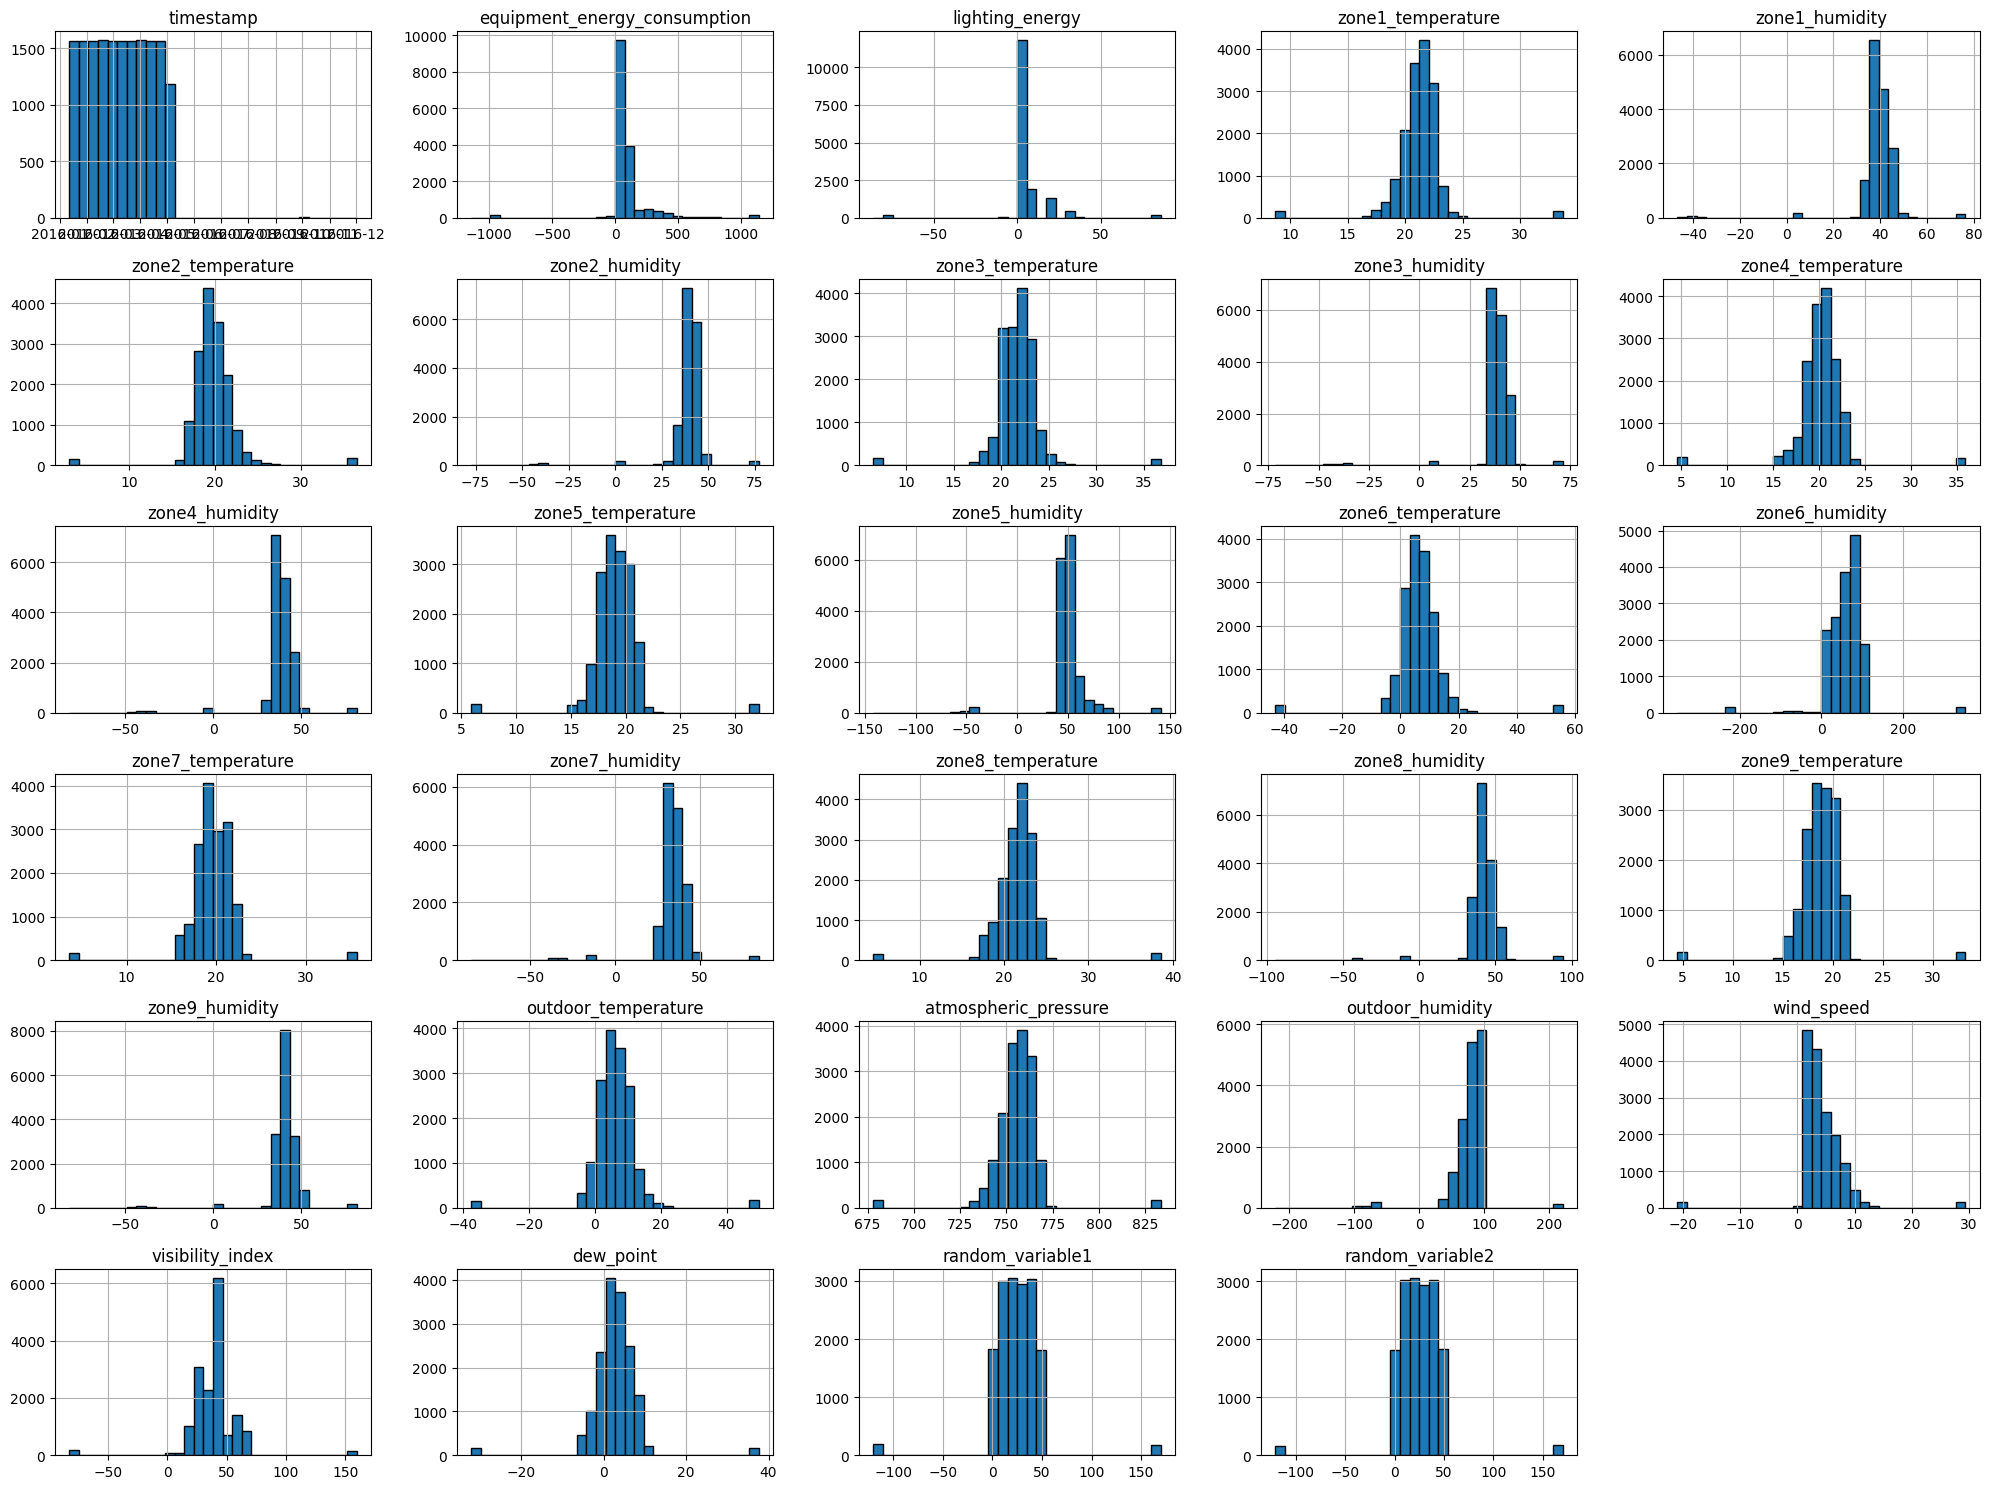

In [53]:
data.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.tight_layout()
plt.show()

In [54]:
# from the distribution we can see that the columns like 'equipment_energy_cosumption', 'wind_speed', 'visibility_index', zone1 to zone9 humidity columns, outdoor_humidity, have skewed distributions that means these columns contain outliers so we can fill the missing values as median values. Others columns are normally distributed so we can go with mean.

In [55]:
mean_cols = [
    'lighting_energy',
    'zone1_temperature', 'zone2_temperature', 'zone3_temperature', 'zone4_temperature',
    'zone5_temperature', 'zone6_temperature', 'zone7_temperature', 'zone8_temperature', 'zone9_temperature',
    'outdoor_temperature', 'atmospheric_pressure', 'dew_point',
    'random_variable1', 'random_variable2'
]
for col in mean_cols:
    data[col].fillna(data[col].mean(), inplace=True)

In [56]:
median_cols = [
    'equipment_energy_consumption', 'wind_speed', 'visibility_index',
    'zone1_humidity', 'zone2_humidity', 'zone3_humidity', 'zone4_humidity',
    'zone5_humidity', 'zone6_humidity', 'zone7_humidity', 'zone8_humidity', 'zone9_humidity',
    'outdoor_humidity'
]
for col in median_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16857 non-null  float64       
 2   lighting_energy               16857 non-null  float64       
 3   zone1_temperature             16857 non-null  float64       
 4   zone1_humidity                16857 non-null  float64       
 5   zone2_temperature             16857 non-null  float64       
 6   zone2_humidity                16857 non-null  float64       
 7   zone3_temperature             16857 non-null  float64       
 8   zone3_humidity                16857 non-null  float64       
 9   zone4_temperature             16857 non-null  float64       
 10  zone4_humidity                16857 non-null  float64       
 11  zone5_temperature           

In [62]:
data.describe()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,16857,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,...,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000
mean,2016-03-10 02:16:38.647446272,93.872992,3.938101,21.249414,39.055580,19.793113,39.535636,21.665733,38.211662,20.239922,...,18.851085,40.320577,6.218582,755.757602,79.223550,4.186361,38.531744,2.783507,24.854981,25.093780
min,2016-01-11 17:00:00,-1139.985693,-86.002966,8.726818,-46.660000,2.988199,-77.265503,6.543921,-71.406273,4.613485,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,2016-02-09 21:20:00,50.000000,0.000000,20.600000,37.126667,18.666667,37.933333,20.600000,36.754000,19.292500,...,17.890000,38.363333,3.166667,751.100000,72.000000,2.000000,29.000000,0.583333,12.808011,12.805830
50%,2016-03-10 00:10:00,60.000000,0.000000,21.290000,39.226667,19.700000,40.293333,21.666667,38.400000,20.239922,...,18.851085,40.363333,6.218582,755.800000,84.166667,4.000000,40.000000,2.783507,24.854981,25.093780
75%,2016-04-08 03:40:00,90.000000,3.938101,22.100000,42.296667,20.700000,42.790000,22.700000,41.000000,21.290000,...,20.100000,43.500000,9.050000,761.733333,91.500000,5.666667,40.000000,5.150000,37.242702,37.277176
max,2016-12-01 15:50:00,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617
std,NaN,177.925361,14.201976,2.103773,9.686901,2.862039,9.867143,2.531838,9.876752,2.714851,...,2.470119,10.870511,7.371851,13.298454,27.902210,4.300266,20.799517,5.943526,25.564582,24.891957


Exploratory Data Analysis.

In [80]:
# Setting Seaborn theme for better visuals
sns.set_theme(style="whitegrid", palette="deep")


In [81]:
# Ensure plots display inline in Jupyter notebook
%matplotlib inline

In [82]:
# Extracting hour and month for temporal analysis
data['hour'] = data['timestamp'].dt.hour
data['month'] = data['timestamp'].dt.month

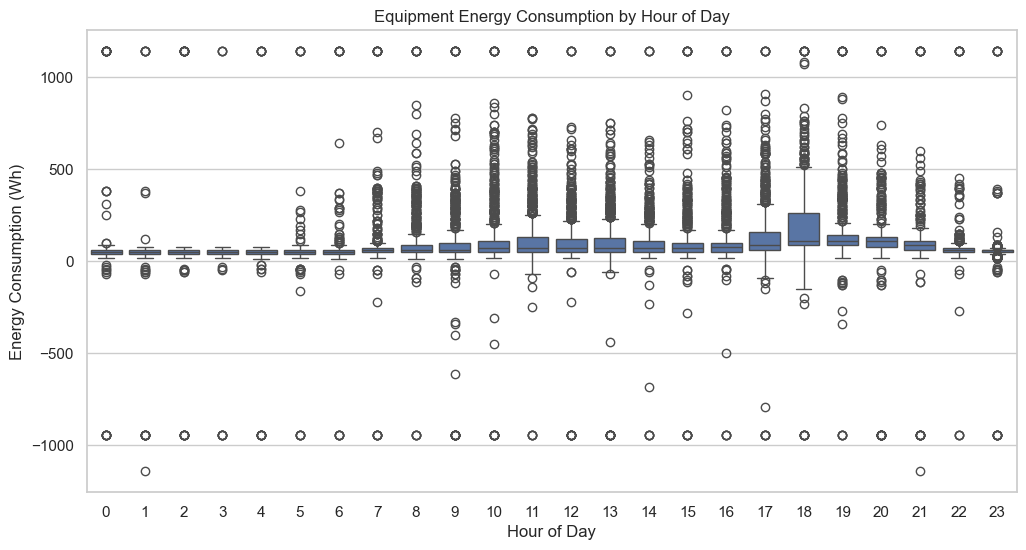

In [83]:
# Plotting energy consumption by hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='equipment_energy_consumption', data=data)
plt.title('Equipment Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

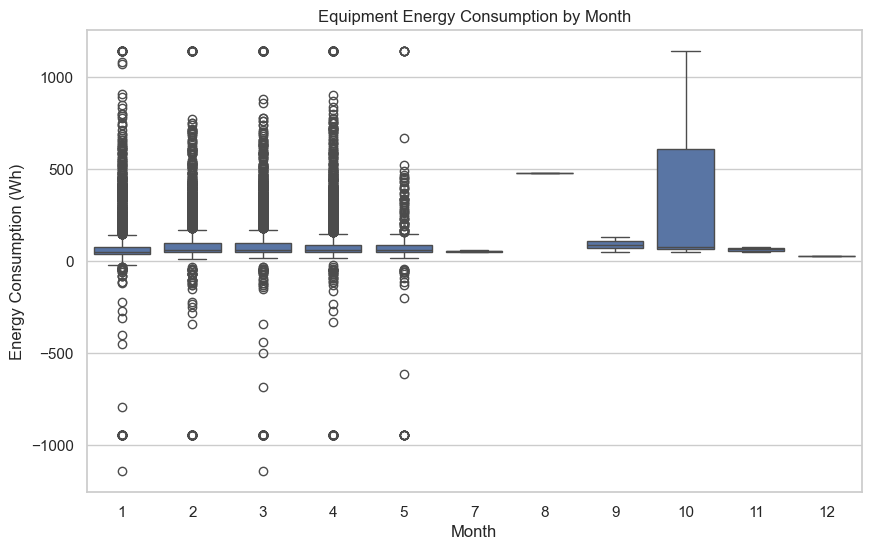

In [84]:
# Plotting energy consumption by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='equipment_energy_consumption', data=data)
plt.title('Equipment Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Wh)')
plt.show()


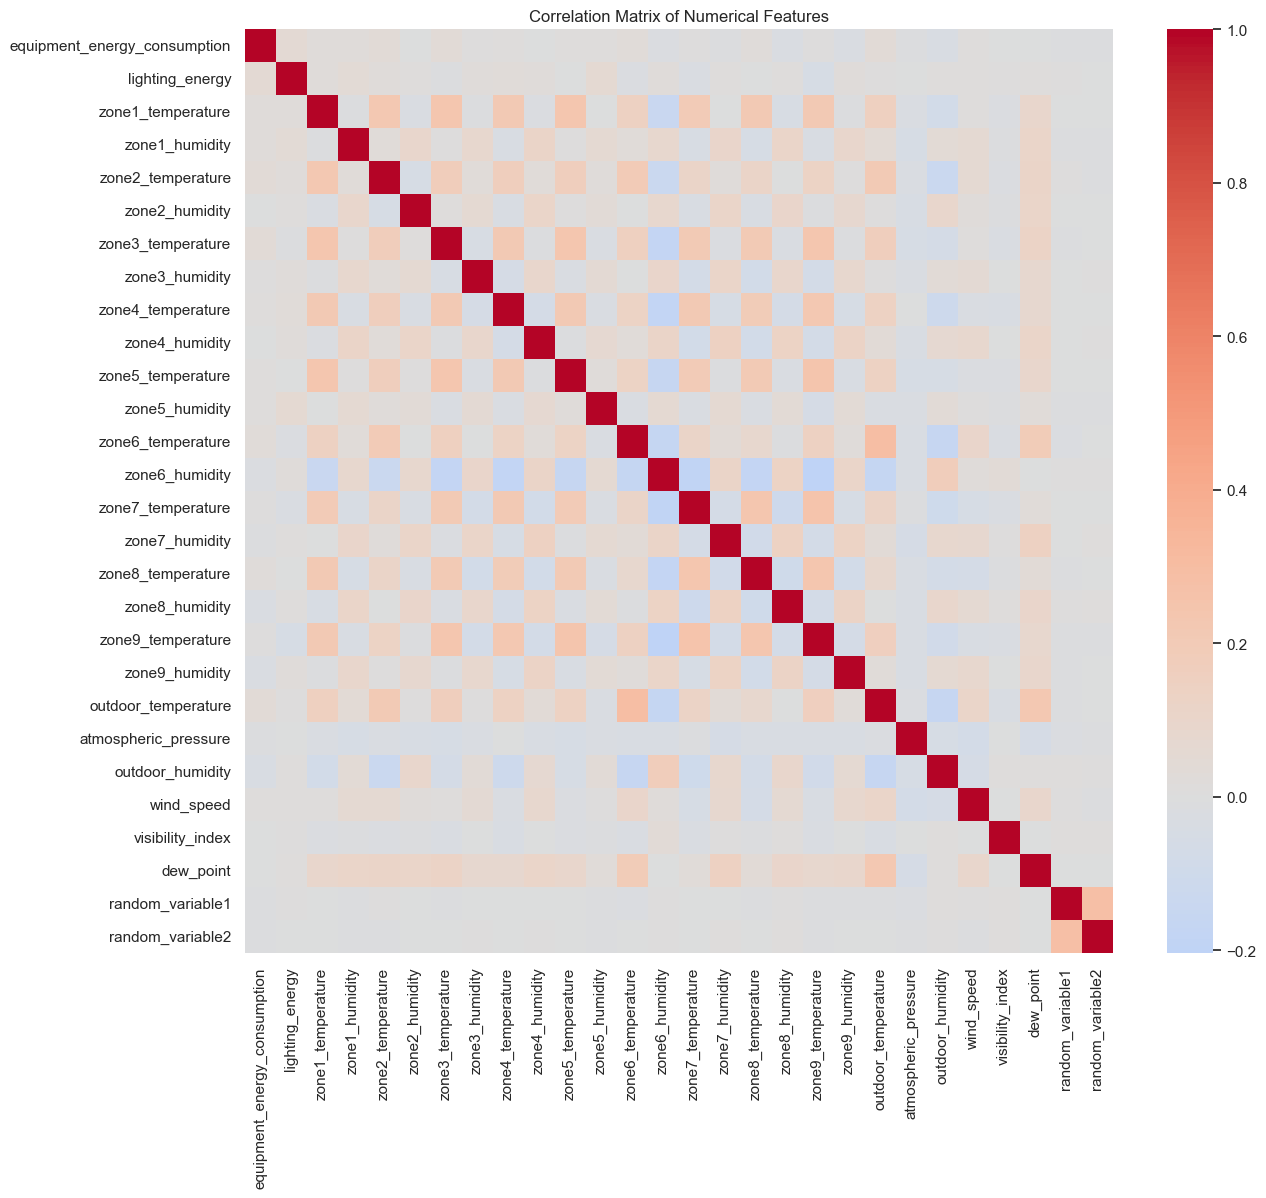

In [86]:
# Correlation analysis
# Selecting numerical features for correlation
numerical_features = [
    'equipment_energy_consumption', 'lighting_energy',
    'zone1_temperature', 'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
    'zone3_temperature', 'zone3_humidity', 'zone4_temperature', 'zone4_humidity',
    'zone5_temperature', 'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
    'zone7_temperature', 'zone7_humidity', 'zone8_temperature', 'zone8_humidity',
    'zone9_temperature', 'zone9_humidity', 'outdoor_temperature',
    'atmospheric_pressure', 'outdoor_humidity', 'wind_speed', 'visibility_index',
    'dew_point', 'random_variable1', 'random_variable2'
]

# Computing correlation matrix
corr_matrix = data[numerical_features].corr()
# Plotting correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [87]:
# Focusing on correlations with the target variable
target_corr = corr_matrix['equipment_energy_consumption'].sort_values(ascending=False)
print("\nCorrelations with Equipment Energy Consumption:")
print(target_corr)


Correlations with Equipment Energy Consumption:
equipment_energy_consumption    1.000000
lighting_energy                 0.053746
zone2_temperature               0.040193
zone3_temperature               0.036099
outdoor_temperature             0.031681
zone6_temperature               0.030794
zone1_humidity                  0.025691
zone8_temperature               0.018573
zone1_temperature               0.017542
zone4_temperature               0.016202
wind_speed                      0.010788
zone5_temperature               0.008361
zone5_humidity                  0.007628
zone7_temperature               0.006967
zone3_humidity                  0.006224
zone9_temperature               0.004270
visibility_index               -0.000266
zone4_humidity                 -0.003298
dew_point                      -0.003348
zone2_humidity                 -0.003767
zone7_humidity                 -0.006740
random_variable2               -0.010285
atmospheric_pressure           -0.012911
random_v

In [88]:
# Zone-wise temperature and humidity analysis
# Aggregating average temperature and humidity per zone
zone_temp_cols = [f'zone{i}_temperature' for i in range(1, 10)]
zone_hum_cols = [f'zone{i}_humidity' for i in range(1, 10)]
zone_temps = data[zone_temp_cols].mean()
zone_hums = data[zone_hum_cols].mean()


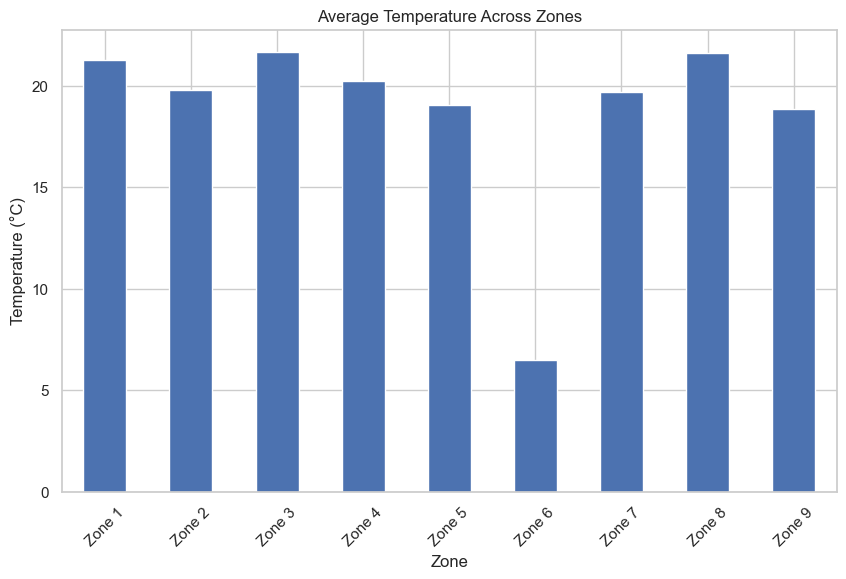

In [89]:
# Plotting average temperature per zone
plt.figure(figsize=(10, 6))
zone_temps.plot(kind='bar')
plt.title('Average Temperature Across Zones')
plt.xlabel('Zone')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=range(9), labels=[f'Zone {i+1}' for i in range(9)], rotation=45)
plt.show()


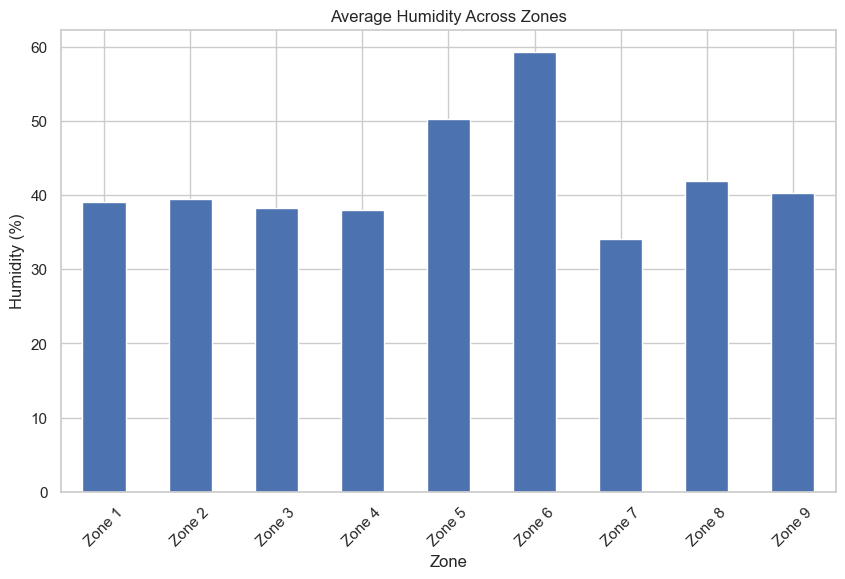

In [90]:
# Plotting average humidity per zone
plt.figure(figsize=(10, 6))
zone_hums.plot(kind='bar')
plt.title('Average Humidity Across Zones')
plt.xlabel('Zone')
plt.ylabel('Humidity (%)')
plt.xticks(ticks=range(9), labels=[f'Zone {i+1}' for i in range(9)], rotation=45)
plt.show()


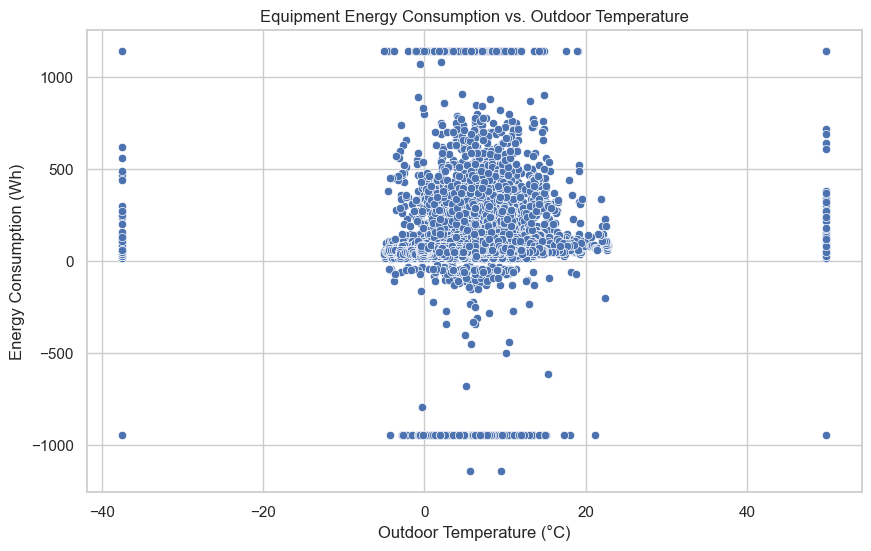

In [91]:
# Relationship between energy consumption and key features
# Scatter plot: equipment_energy_consumption vs. outdoor_temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='outdoor_temperature', y='equipment_energy_consumption', data=data)
plt.title('Equipment Energy Consumption vs. Outdoor Temperature')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

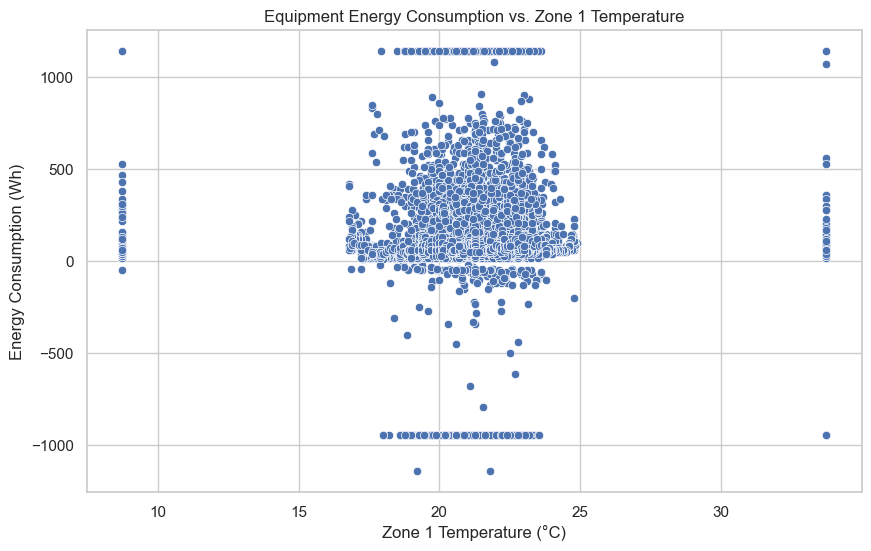

In [92]:
# Scatter plot: equipment_energy_consumption vs. zone1_temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zone1_temperature', y='equipment_energy_consumption', data=data)
plt.title('Equipment Energy Consumption vs. Zone 1 Temperature')
plt.xlabel('Zone 1 Temperature (°C)')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

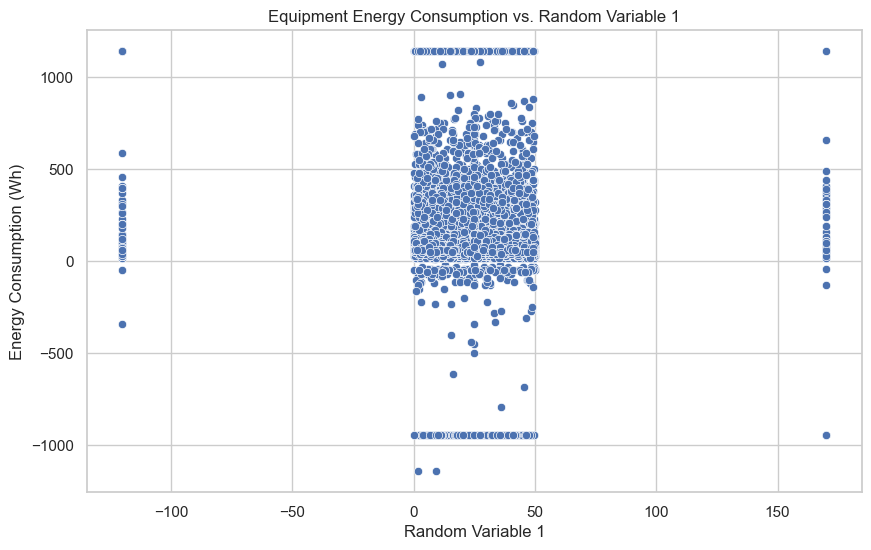

In [93]:
#Analysis of random variables
# Scatter plot: equipment_energy_consumption vs. random_variable1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='random_variable1', y='equipment_energy_consumption', data=data)
plt.title('Equipment Energy Consumption vs. Random Variable 1')
plt.xlabel('Random Variable 1')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

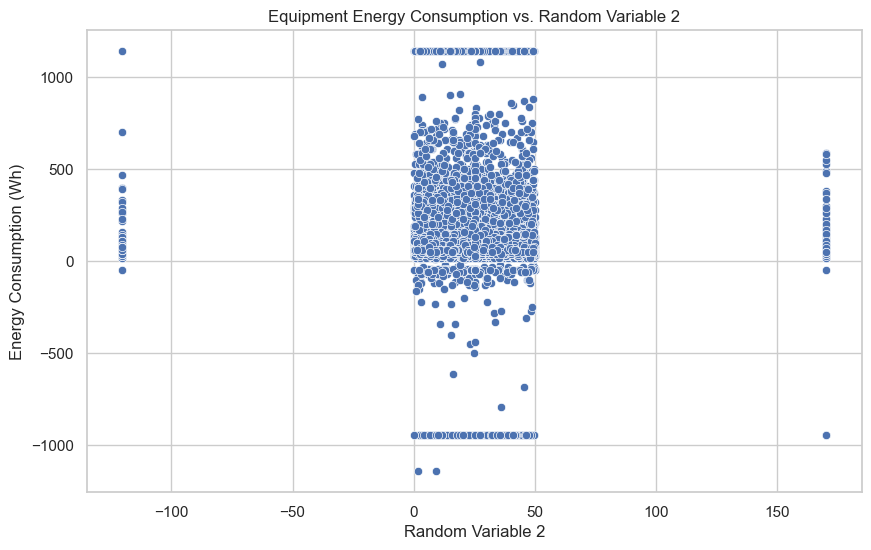

In [94]:
# Scatter plot: equipment_energy_consumption vs. random_variable2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='random_variable2', y='equipment_energy_consumption', data=data)
plt.title('Equipment Energy Consumption vs. Random Variable 2')
plt.xlabel('Random Variable 2')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

In [96]:
# Outlier analysis
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

In [97]:
# Key features for outlier analysis
key_features = [
    'equipment_energy_consumption', 'lighting_energy',
    'zone1_temperature', 'zone1_humidity',
    'random_variable1', 'random_variable2'
]

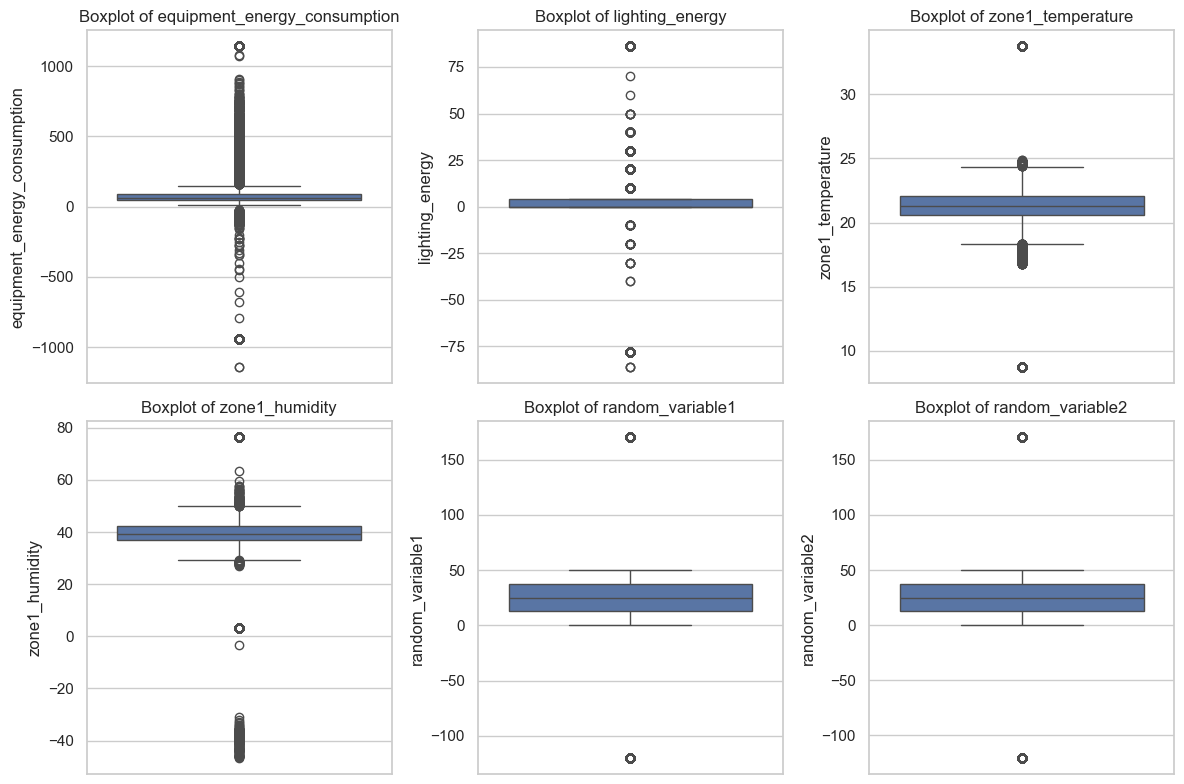

In [98]:
# Boxplots for key features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [99]:
# Detecting and summarizing outliers
print("\nOutlier Analysis (IQR Method):")
outlier_summary = {}
for feature in key_features:
    num_outliers, lower, upper = detect_outliers_iqr(data, feature)
    outlier_summary[feature] = {'num_outliers': num_outliers, 'lower_bound': lower, 'upper_bound': upper}
    print(f"{feature}: {num_outliers} outliers (lower: {lower:.2f}, upper: {upper:.2f})")


Outlier Analysis (IQR Method):
equipment_energy_consumption: 2304 outliers (lower: -10.00, upper: 150.00)
lighting_energy: 4190 outliers (lower: -5.91, upper: 9.85)
zone1_temperature: 753 outliers (lower: 18.35, upper: 24.35)
zone1_humidity: 565 outliers (lower: 29.37, upper: 50.05)
random_variable1: 366 outliers (lower: -23.84, upper: 73.89)
random_variable2: 337 outliers (lower: -23.90, upper: 73.98)


In [100]:

# Handling outliers for equipment_energy_consumption
# Capping at 1st and 99th percentiles to reduce extreme values
equip_energy = data['equipment_energy_consumption']
lower_cap = equip_energy.quantile(0.01)
upper_cap = equip_energy.quantile(0.99)
data['equipment_energy_consumption_capped'] = equip_energy.clip(lower=lower_cap, upper=upper_cap)

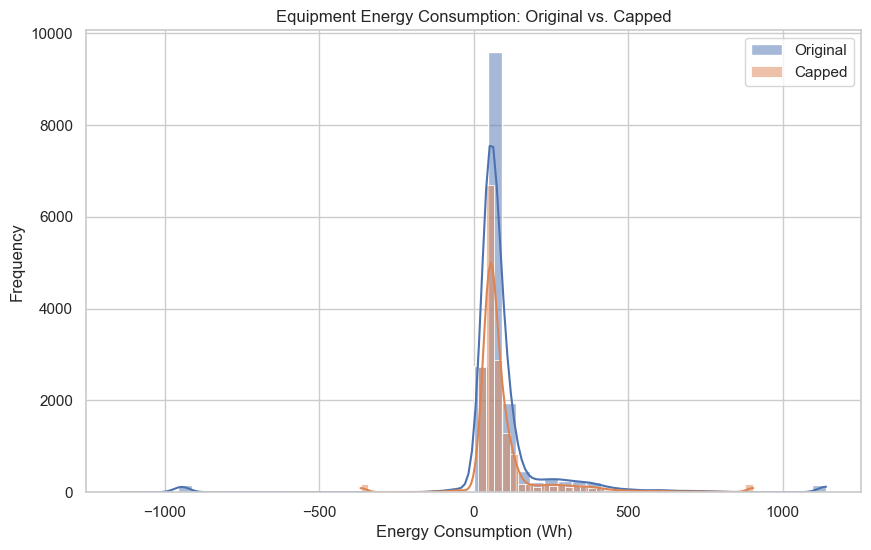

In [101]:
# Visualizing capped vs. original distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['equipment_energy_consumption'], bins=50, kde=True, label='Original', alpha=0.5)
sns.histplot(data['equipment_energy_consumption_capped'], bins=50, kde=True, label='Capped', alpha=0.5)
plt.title('Equipment Energy Consumption: Original vs. Capped')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [102]:

# Assessing random variables for dropping
# Checking correlation with target after capping
corr_random1 = data['random_variable1'].corr(data['equipment_energy_consumption_capped'])
corr_random2 = data['random_variable2'].corr(data['equipment_energy_consumption_capped'])
print("\nCorrelation of random variables with capped target:")
print(f"random_variable1: {corr_random1:.4f}")
print(f"random_variable2: {corr_random2:.4f}")


Correlation of random variables with capped target:
random_variable1: -0.0143
random_variable2: -0.0094


In [103]:
# Decision: Drop random variables if correlations are very low (< 0.05)
if abs(corr_random1) < 0.05 and abs(corr_random2) < 0.05:
    data = data.drop(columns=['random_variable1', 'random_variable2'])
    print("Dropped random_variable1 and random_variable2 due to low correlation with target.")
else:
    print("Retained random_variable1 and/or random_variable2 for further analysis.")

Dropped random_variable1 and random_variable2 due to low correlation with target.


In [104]:
data['day_of_week'] = data['timestamp'].dt.day_name()

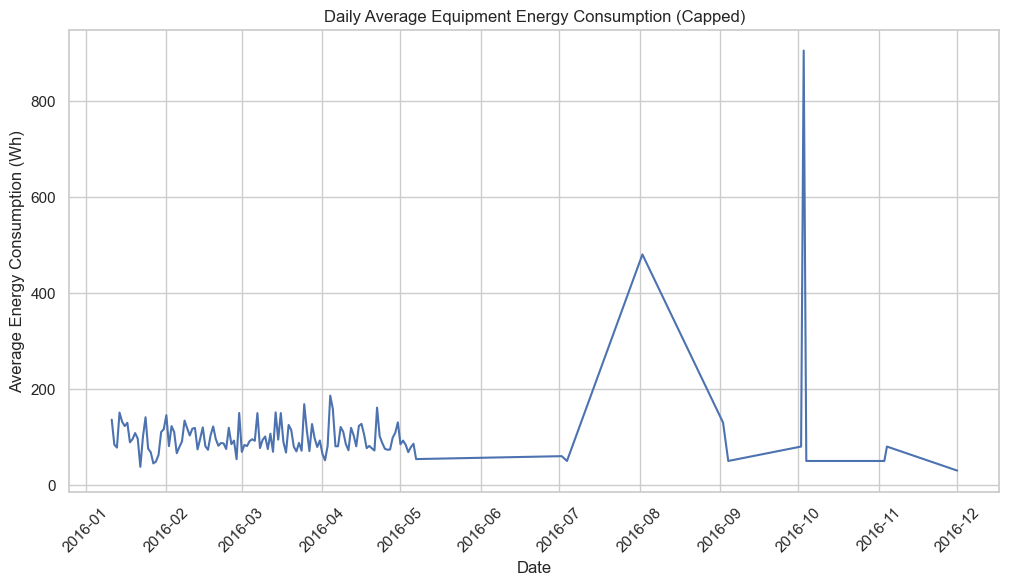

In [105]:
# Temporal trends: Daily average energy consumption
daily_avg = data.groupby(data['timestamp'].dt.date)['equipment_energy_consumption_capped'].mean()
plt.figure(figsize=(12, 6))
daily_avg.plot(kind='line')
plt.title('Daily Average Equipment Energy Consumption (Capped)')
plt.xlabel('Date')
plt.ylabel('Average Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.show()

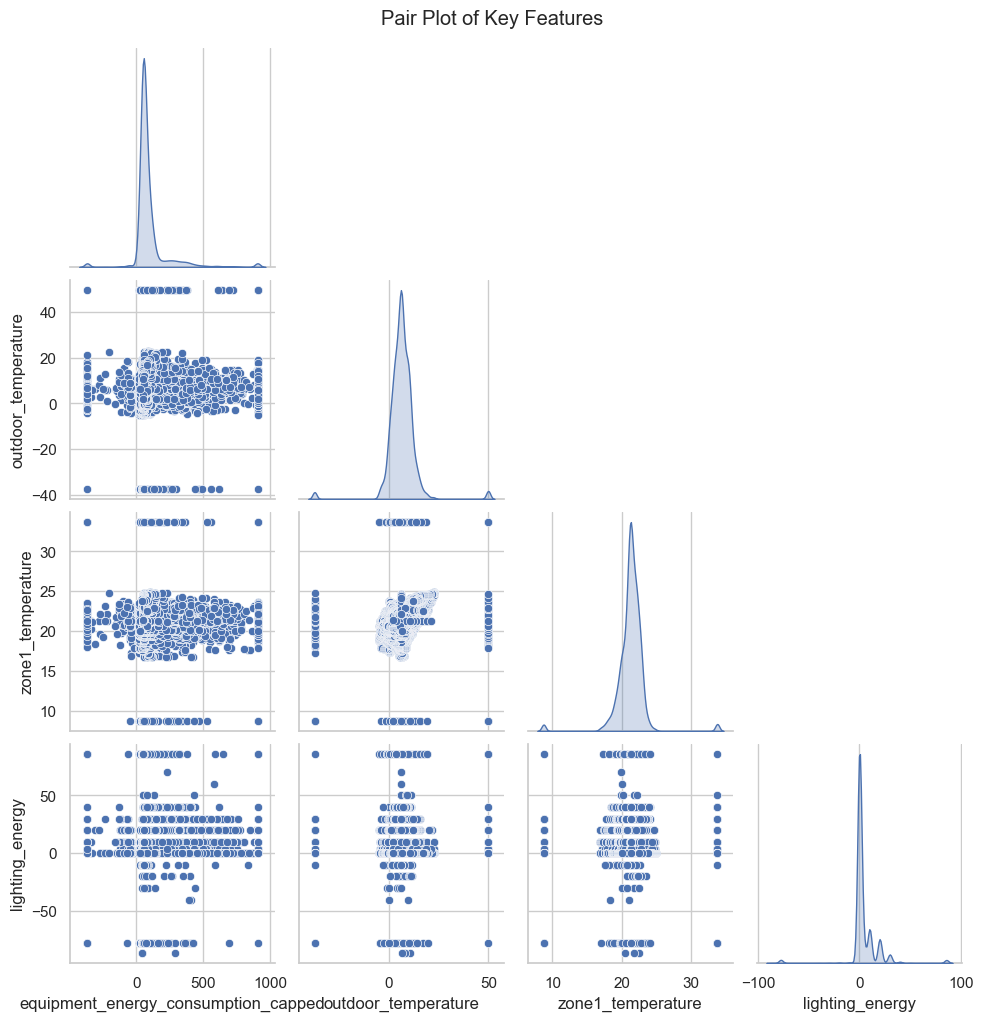

In [106]:
# Pair plot for key features
key_features_subset = ['equipment_energy_consumption_capped', 'outdoor_temperature', 
                      'zone1_temperature', 'lighting_energy']
sns.pairplot(data[key_features_subset], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

c:\Users\bsumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


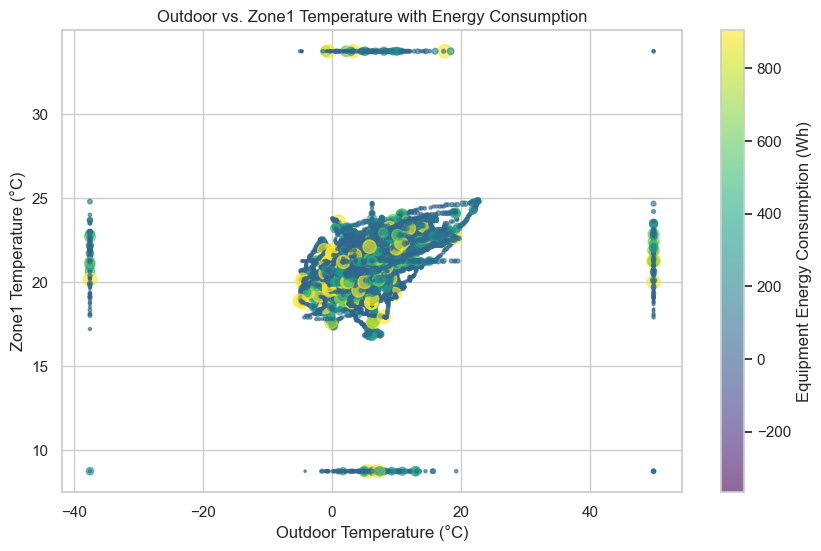

In [107]:
# 11.3 Feature interaction: Outdoor vs. Zone1 temperature with energy consumption
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['outdoor_temperature'], data['zone1_temperature'], 
                     c=data['equipment_energy_consumption_capped'], s=data['equipment_energy_consumption_capped']*0.1, 
                     cmap='viridis', alpha=0.6)
plt.colorbar(label='Equipment Energy Consumption (Wh)')
plt.title('Outdoor vs. Zone1 Temperature with Energy Consumption')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Zone1 Temperature (°C)')
plt.show()


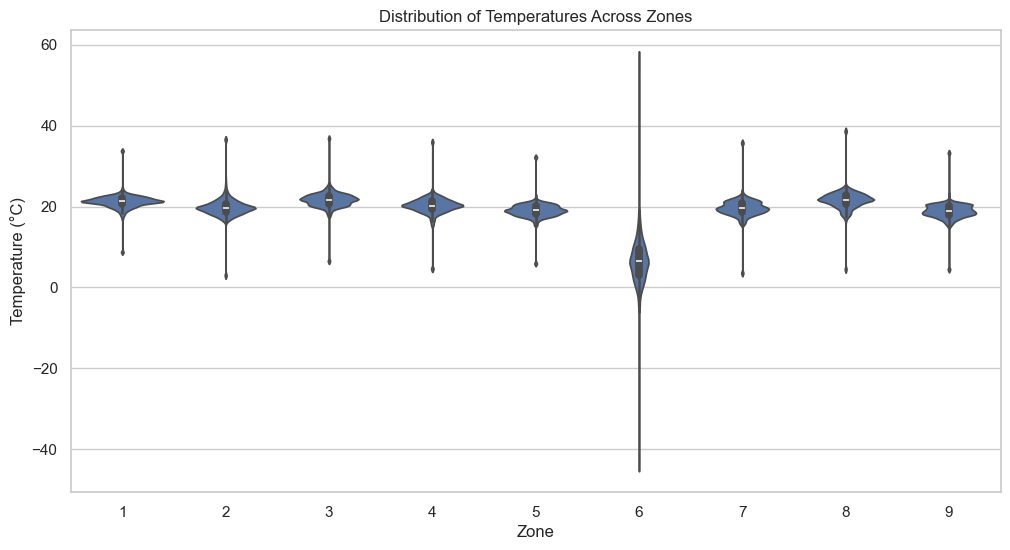

In [108]:
# 11.4 Violin plot for zone temperatures
zone_temp_data = data[zone_temp_cols].melt(var_name='Zone', value_name='Temperature')
zone_temp_data['Zone'] = zone_temp_data['Zone'].str.extract('(\d+)').astype(int)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Zone', y='Temperature', data=zone_temp_data)
plt.title('Distribution of Temperatures Across Zones')
plt.xlabel('Zone')
plt.ylabel('Temperature (°C)')
plt.show()

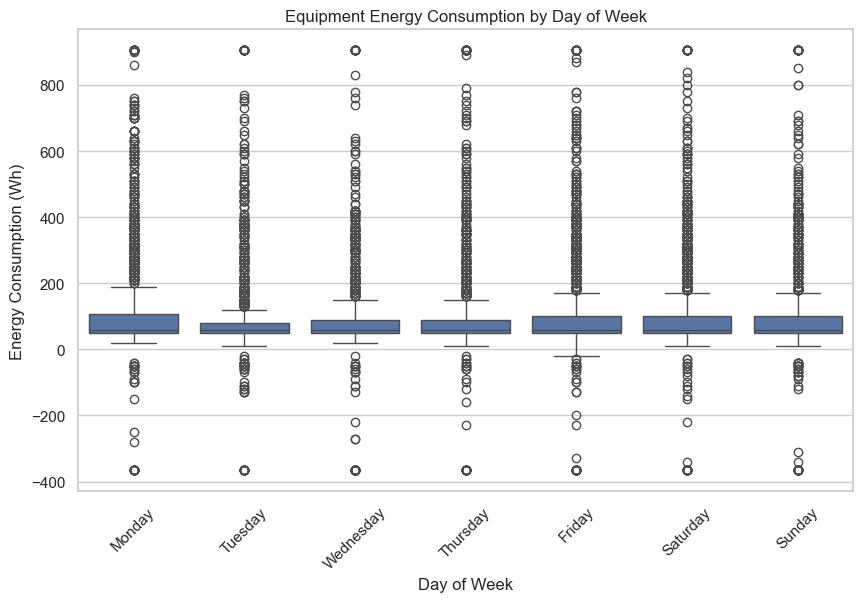

In [109]:
# Energy consumption by day of week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='equipment_energy_consumption_capped', data=data, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Equipment Energy Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.show()


Feature Engineering

In [111]:
# Handling outliers for equipment_energy_consumption (from EDA)
equip_energy = data['equipment_energy_consumption']
lower_cap = equip_energy.quantile(0.01)
upper_cap = equip_energy.quantile(0.99)
data['equipment_energy_consumption_capped'] = equip_energy.clip(lower=lower_cap, upper=upper_cap)

In [112]:
# Handling negative lighting_energy values (set to zero)
data['lighting_energy'] = data['lighting_energy'].clip(lower=0)

In [113]:
# Temporal Features
# Extracting hour, day of week, and date
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
data['date'] = data['timestamp'].dt.date

In [115]:
# Cyclic encoding for hour (24-hour cycle)
import numpy as np
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

In [ ]:
# Cyclic encoding for day of week (7-day cycle)
data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

In [117]:
# Weekend indicator (1 for Saturday/Sunday, 0 otherwise)
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

In [118]:
# Lagged features: Previous day's energy consumption
data['daily_lag_1'] = data.groupby('date')['equipment_energy_consumption_capped'].shift(1)
data['daily_lag_1'] = data['daily_lag_1'].fillna(method='bfill')  # Backfill for first row

In [119]:
# Rolling mean (24-hour window)
data['rolling_mean_24h'] = data['equipment_energy_consumption_capped'].rolling(window=24, min_periods=1).mean()


In [120]:
#Zone-Based Features
# Zone temperature and humidity columns
zone_temp_cols = [f'zone{i}_temperature' for i in range(1, 10)]
zone_hum_cols = [f'zone{i}_humidity' for i in range(1, 10)]

In [121]:
# Average and max temperature/humidity across zones
data['avg_zone_temp'] = data[zone_temp_cols].mean(axis=1)
data['max_zone_temp'] = data[zone_temp_cols].max(axis=1)
data['avg_zone_humidity'] = data[zone_hum_cols].mean(axis=1)

In [122]:
# Temperature difference: outdoor vs. average zone temperature
data['temp_diff_outdoor_zone'] = data['outdoor_temperature'] - data['avg_zone_temp']

In [123]:
# Standard deviation of zone temperatures
data['zone_temp_std'] = data[zone_temp_cols].std(axis=1)

In [124]:
# Interaction Features
# Outdoor temperature * zone1 temperature
data['outdoor_zone1_temp_interaction'] = data['outdoor_temperature'] * data['zone1_temperature']


In [125]:
# Lighting energy to equipment energy ratio (avoid division by zero)
data['lighting_to_equip_ratio'] = data['lighting_energy'] / (data['equipment_energy_consumption_capped'] + 1e-6)


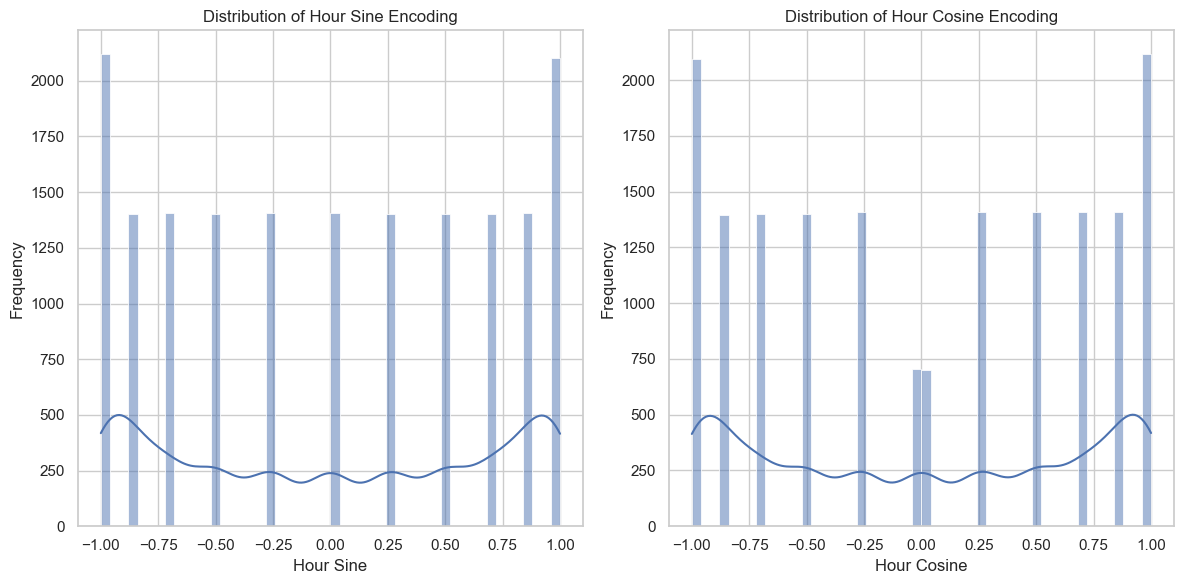

In [126]:
# Visualizing Key Features
# Histogram of cyclic hour features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['hour_sin'], bins=50, kde=True)
plt.title('Distribution of Hour Sine Encoding')
plt.xlabel('Hour Sine')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(data['hour_cos'], bins=50, kde=True)
plt.title('Distribution of Hour Cosine Encoding')
plt.xlabel('Hour Cosine')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


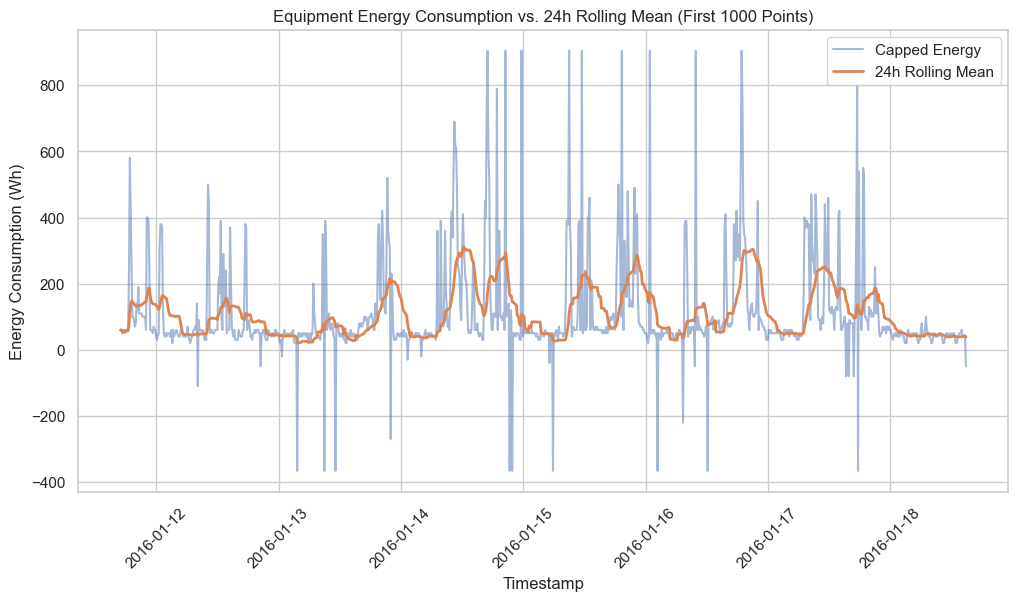

In [127]:
# Line plot of rolling mean vs. original energy
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'][:1000], data['equipment_energy_consumption_capped'][:1000], label='Capped Energy', alpha=0.5)
plt.plot(data['timestamp'][:1000], data['rolling_mean_24h'][:1000], label='24h Rolling Mean', linewidth=2)
plt.title('Equipment Energy Consumption vs. 24h Rolling Mean (First 1000 Points)')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


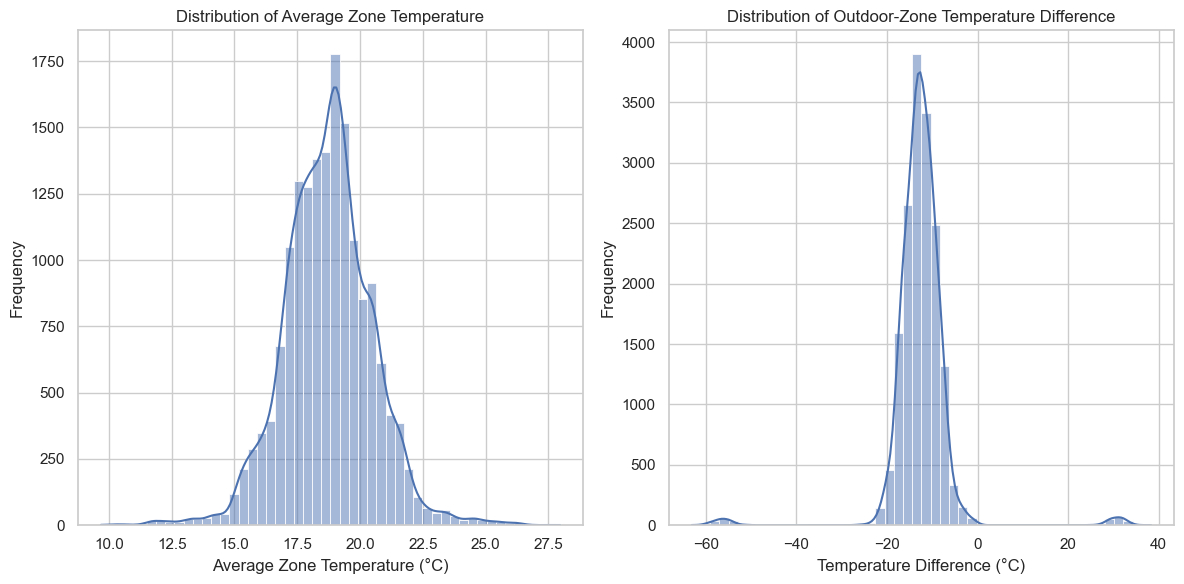

In [128]:
# Histogram of zone-based features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['avg_zone_temp'], bins=50, kde=True)
plt.title('Distribution of Average Zone Temperature')
plt.xlabel('Average Zone Temperature (°C)')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(data['temp_diff_outdoor_zone'], bins=50, kde=True)
plt.title('Distribution of Outdoor-Zone Temperature Difference')
plt.xlabel('Temperature Difference (°C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


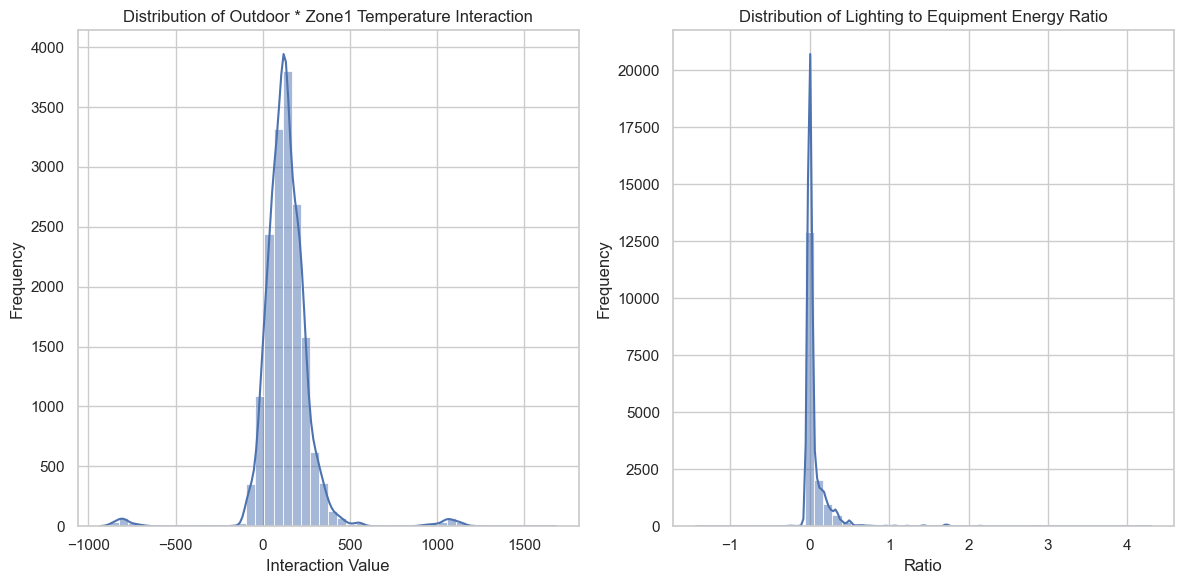

In [129]:
# Histogram of interaction features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['outdoor_zone1_temp_interaction'], bins=50, kde=True)
plt.title('Distribution of Outdoor * Zone1 Temperature Interaction')
plt.xlabel('Interaction Value')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(data['lighting_to_equip_ratio'], bins=50, kde=True)
plt.title('Distribution of Lighting to Equipment Energy Ratio')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()